<a href="https://colab.research.google.com/github/RahulMhn/heart-stroke/blob/main/ML_Stroke_Project_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maichine Learning Project - Stroke Analysis**

About Dataset

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [1]:
import pandas as pd                                                         #Read dataset
df=pd.read_csv('/content/drive/MyDrive/Datasets/Datasets/stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
df.drop(["id"],axis=1,inplace=True)                #Drop the unnecessary column
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.isna().sum()                               #Check is there missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())           #filling values
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [6]:
df.dtypes                            #ensure all columns have same data types

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**LABEL ENCODER**

In [7]:
from sklearn.preprocessing import LabelEncoder                        #If not we use this method
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])
df["work_type"]=le.fit_transform(df["work_type"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])

In [8]:
X=df.iloc[:,:-1]                                                         #split data into input and output
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [9]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler                      #Scaling of datas - method 1. min maxscaler  and  2.Standard scaler
scaler=MinMaxScaler()                                           # here scaler is used to put range in btw o-1
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.5       , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.33333333],
       [0.        , 0.74365234, 0.        , ..., 0.67902317, 0.21298095,
        0.66666667],
       [0.5       , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.66666667],
       ...,
       [0.        , 0.42626953, 0.        , ..., 0.12865848, 0.2325315 ,
        0.66666667],
       [0.5       , 0.62158203, 0.        , ..., 0.51320284, 0.17525773,
        0.33333333],
       [0.        , 0.53613281, 0.        , ..., 0.13922999, 0.18213058,
        0.        ]])

In [11]:
from sklearn.model_selection import train_test_split                     #split dataset ito training and testing
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

**PACKAGES**

In [12]:
from sklearn.neighbors import KNeighborsClassifier                     #create model using algorithm and train data
from sklearn.svm import SVC                              #KNN - CK NEAREST NEIGHBORS
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier          # BAGGING TECHNIQUES - Decision Tree & Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier          #BOOSTING TECHNIQUES - Ada BoostClassifier (Decision Tree)
knn=KNeighborsClassifier()
sv=SVC()
gu=GaussianNB()
ds=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ad=AdaBoostClassifier(random_state=1)
algo_accuracy=[]

In [13]:
from sklearn.metrics import classification_report,accuracy_score               #Check performance of model
models=[knn,sv,gu,ds,rf,ad]
for model in models:
  print("*********",model,"*******")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))                           # F1 SCORE = 2 * PRECI * RECA / PRECI + RECA
  print('Accuracy score=',accuracy_score(y_test,y_pred))                # ACCURACY = TRUE POSIT + TRUE NEGA / TRUE POSI + FALSE POSI + TRUE NEGA + FALSE NEGA
  algo_accuracy.append(accuracy_score(y_test,y_pred)*100)               # RECALL =  TP / TP + FN    #PRECISION = TP / TP + FP

********* KNeighborsClassifier() *******
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.10      0.01      0.02        83

    accuracy                           0.94      1533
   macro avg       0.52      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533

Accuracy score= 0.9406392694063926
********* SVC() *******
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533

Accuracy score= 0.9458577951728636
********* GaussianNB() *******
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1450
           1       0.19      0.43      0.27        83

    accuracy    

In [14]:
print(algo_accuracy)

[94.06392694063926, 94.58577951728635, 87.01891715590345, 91.45466405740378, 94.3900848010437, 94.45531637312459]


In [15]:
import matplotlib.pyplot as plt          #package for numerical and statistical visualisation

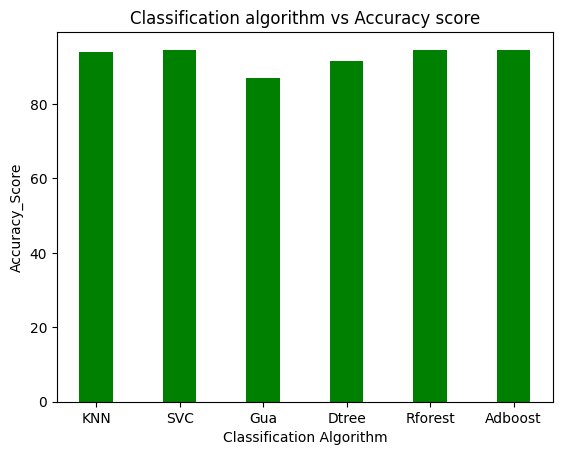

In [16]:
algo=['KNN','SVC','Gua','Dtree','Rforest','Adboost']
plt.bar(algo,algo_accuracy,width=0.4,color='g')
plt.plot()
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy_Score')
plt.title('Classification algorithm vs Accuracy score')
plt.show()



HERE SVC HAS BEST ACCURACY

**HYPER PARAMETER TUNING**  - Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set.

In [17]:
knn_new=KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='auto')            #weights - distance btw data points
knn_new.fit(X_train,y_train)
y_pred=knn_new.predict(X_test)
y_pred
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.92      1533



In [18]:
rf_new=RandomForestClassifier(criterion='gini',random_state=1,n_estimators=100)
rf_new.fit(X_train,y_train)
y_pred=rf_new.predict(X_test)
y_pred
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



In [19]:
from sklearn.model_selection import GridSearchCV
estimate={"criterion":["gini","entropy"],"max_depth":[1,2,None],"max_features":["auto","sqrt"]}     # METHODS TO MEASURE IMPURITY - 1.entropy  2.gini impurity
grid=GridSearchCV(ds,estimate,cv=10,n_jobs=1)        #cv - Cross-validation is a technique for evaluating a machine learning model and testing its performance.

In [20]:
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [21]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**OVERSAMPLING**      -  increase the number datapoints in minority class , makes minority as same as majority.

In [22]:
from imblearn.over_sampling import SMOTE       #Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique
oversample=SMOTE(random_state=1)                #for increasing the number of cases in your dataset in a balanced way.
X_os,y_os=oversample.fit_resample(X,y)


In [23]:
y_os.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [24]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,random_state=1,test_size=0.3)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_os=scaler.fit_transform(X_train_os)
X_test_os=scaler.transform(X_test_os)

In [26]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
nb_os=GaussianNB()
rf_os=RandomForestClassifier()
algo_accuracy=[]
l=[sv_os,knn_os,nb_os,rf_os]
for i in l:
  print('*********************************',i,'****************************************')
  i.fit(X_train_os,y_train_os)
  y_pred_os=i.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print('Accuracy=',accuracy_score(y_test_os,y_pred_os))
  algo_accuracy.append(accuracy_score(y_test_os,y_pred_os)*100)

********************************* SVC() ****************************************
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1453
           1       0.81      0.88      0.84      1464

    accuracy                           0.84      2917
   macro avg       0.84      0.84      0.84      2917
weighted avg       0.84      0.84      0.84      2917

Accuracy= 0.8371614672608845
********************************* KNeighborsClassifier() ****************************************
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1453
           1       0.82      0.93      0.87      1464

    accuracy                           0.86      2917
   macro avg       0.87      0.86      0.86      2917
weighted avg       0.87      0.86      0.86      2917

Accuracy= 0.8645869043537882
********************************* GaussianNB() ****************************************
              precisi

HERE  IN OVERSAMPLING RANDOM FOREST HAS HIGH ACCURACY

**UNDERSAMPLING**   -  reduce no:of samples in majority class

In [27]:
from imblearn.under_sampling import RandomUnderSampler    #RandomUnderSampler randomly deletes the rows of the majority classes according to our sampling strategy.
Undersampler=RandomUnderSampler(random_state=1)
X_us,y_us=Undersampler.fit_resample(X,y)

In [28]:
y_us.value_counts()

0    249
1    249
Name: stroke, dtype: int64

In [29]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,random_state=7,test_size=0.3)

In [30]:
X_train_us=scaler.fit_transform(X_train_us)
X_test_us=scaler.transform(X_test_us)

In [31]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
nb_us=GaussianNB()
rf_us=RandomForestClassifier()
alg_accuracy=[]
l=[sv_us,knn_us,nb_us,rf_us]
for i in l:
  print('*********************************',i,'****************************************')
  i.fit(X_train_us,y_train_us)
  y_pred_us=i.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print('Accuracy=',accuracy_score(y_test_us,y_pred_us))
  alg_accuracy.append(accuracy_score(y_test_us,y_pred_us)*100)

********************************* SVC() ****************************************
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        74
           1       0.81      0.84      0.83        76

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

Accuracy= 0.82
********************************* KNeighborsClassifier() ****************************************
              precision    recall  f1-score   support

           0       0.72      0.77      0.75        74
           1       0.76      0.71      0.73        76

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150

Accuracy= 0.74
********************************* GaussianNB() ****************************************
              precision    recall  f1-score   sup

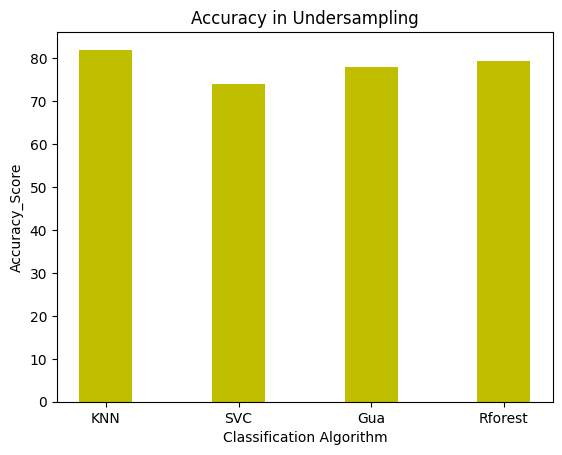

In [32]:
algo=['KNN','SVC','Gua','Rforest']
plt.bar(algo,alg_accuracy,width=0.4,color='y')
plt.plot()
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy_Score')
plt.title('Accuracy in Undersampling')
plt.show()

HERE KNN HAS HIGH ACCURACY

**PCA**  (Principal Component Analysis)  -  A method of feature extraction , create a new column using row of existing column.PCA is an unsupervised statistical technique that is used to reduce the dimensions of the dataset.

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(X)

In [34]:
pca.explained_variance_ratio_

array([0.79658479, 0.18259455])

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_pred
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.22      0.05      0.08        83

    accuracy                           0.94      1533
   macro avg       0.59      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533



In [37]:
X1=df.iloc[:,:-1]
X1


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [38]:
y1=df.iloc[:,-1]
y1

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X1=scaler.fit_transform(X1)
X1

array([[0.5       , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.33333333],
       [0.        , 0.74365234, 0.        , ..., 0.67902317, 0.21298095,
        0.66666667],
       [0.5       , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.66666667],
       ...,
       [0.        , 0.42626953, 0.        , ..., 0.12865848, 0.2325315 ,
        0.66666667],
       [0.5       , 0.62158203, 0.        , ..., 0.51320284, 0.17525773,
        0.33333333],
       [0.        , 0.53613281, 0.        , ..., 0.13922999, 0.18213058,
        0.        ]])

In [40]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3,random_state=1)

In [41]:
from sklearn.metrics import classification_report,accuracy_score
models=[knn,sv,gu,ds,rf,ad]
for model in models:
  print("*********",model,"*******")
  model.fit(X_train1,y_train1)
  y_pred1=model.predict(X_test1)
  print(classification_report(y_test1,y_pred1))
  print('Accuracy score=',accuracy_score(y_test1,y_pred1))
  algo_accuracy.append(accuracy_score(y_test1,y_pred1)*100)

********* KNeighborsClassifier() *******
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1450
           1       0.10      0.01      0.02        83

    accuracy                           0.94      1533
   macro avg       0.52      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533

Accuracy score= 0.9406392694063926
********* SVC() *******
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533

Accuracy score= 0.9458577951728636
********* GaussianNB() *******
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1450
           1       0.19      0.43      0.27        83

    accuracy    

In [42]:
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier()
adboost = AdaBoostClassifier()


knn.fit(X_train1, y_train1)                 # Fit the classifiers and make predictions, then calculate accuracy scores
y_pred_knn = knn.predict(X_test1)
accuracy_knn = accuracy_score(y_test1, y_pred_knn)      # Replace X_train and y_train with your training data
accuracy_knn

svc.fit(X_train1, y_train1)
y_pred_svc = svc.predict(X_test1)
accuracy_svc = accuracy_score(y_test1, y_pred_svc)
accuracy_svc

gnb.fit(X_train1, y_train1)
y_pred_gnb = gnb.predict(X_test1)
accuracy_gnb = accuracy_score(y_test1, y_pred_gnb)
accuracy_gnb

dtree.fit(X_train1, y_train1)
y_pred_dtree = dtree.predict(X_test1)
accuracy_dtree = accuracy_score(y_test1, y_pred_dtree)
accuracy_dtree

rforest.fit(X_train1, y_train1)
y_pred_rforest = rforest.predict(X_test1)
accuracy_rforest = accuracy_score(y_test1, y_pred_rforest)
accuracy_rforest

adboost.fit(X_train1, y_train1)
y_pred_adboost = adboost.predict(X_test1)
accuracy_adboost = accuracy_score(y_test1, y_pred_adboost)
accuracy_adboost

0.9445531637312459

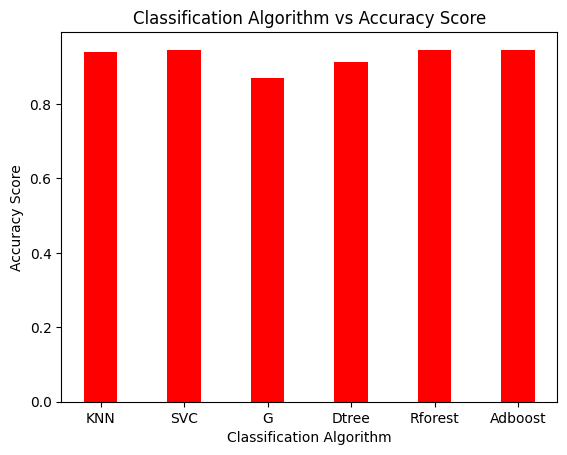

In [43]:
algo = ['KNN', 'SVC', 'G', 'Dtree', 'Rforest', 'Adboost']
algo_accuracy = [accuracy_knn, accuracy_svc, accuracy_gnb, accuracy_dtree, accuracy_rforest, accuracy_adboost]

plt.bar(algo, algo_accuracy, width=0.4, color='r')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Classification Algorithm vs Accuracy Score')
plt.show()

Here SVC has High Accuracy

**VISULAIZATION**

**SEABORN DIFFERENT PLOTINGS**

<Axes: xlabel='stroke', ylabel='count'>

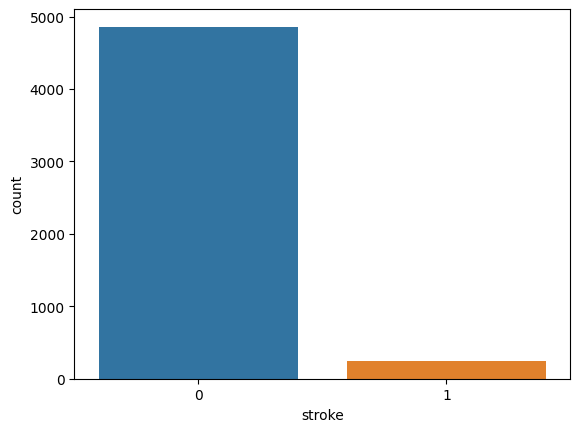

In [44]:
import seaborn as sns
sns.countplot(x='stroke',data=df)

<Axes: xlabel='stroke', ylabel='gender'>

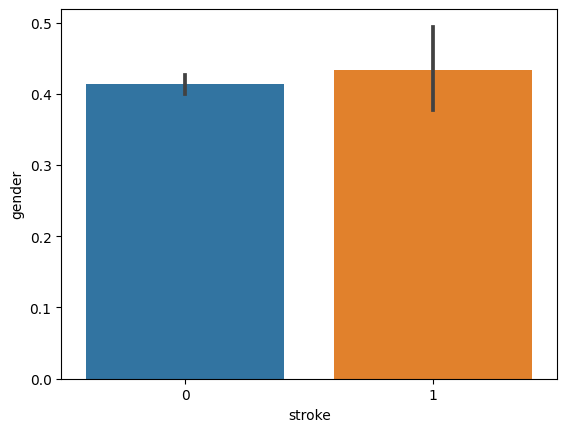

In [45]:
sns.barplot(x='stroke',y='gender',data=df)

HERE MALE HAVE HIGH ACCURACY OF GETTING STROKE

In [52]:
import pickle

In [53]:
filename='model.pkl'
pickle.dump(svc.fit,open(filename,'wb'))

In [54]:
scalername='minmax.pkl'
pickle.dump(scaler,open(scalername,'wb'))

In [55]:
!pip install streamlit

  Using cached streamlit-1.29.0-py2.py3-none-any.whl (8.4 MB)
  Using cached importlib_metadata-6.11.0-py3-none-any.whl (23 kB)
  Using cached validators-0.22.0-py3-none-any.whl (26 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached watchdog-3.0.0-py3-none-manylinux2014_x86_64.whl (82 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [56]:
!wget -q -O - - ipv4.icanhazip.com

34.125.93.165


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] | loadDep:strip-ansi: sill resolveWithNewModule wrap-ansi@

npx: installed 22 in 2.807s
your url is: https://every-shirts-double.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.93.165:8501

